# Telecom X - Análisis de Evasión de Clientes
Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

¿Qué vas a practicar?
✅ Importar y manipular datos desde una API de manera eficiente.
✅ Aplicar los conceptos de ETL (Extracción, Transformación y Carga) en la preparación de los datos.
✅ Crear visualizaciones estratégicas para identificar patrones y tendencias.
✅ Realizar un Análisis Exploratorio de Datos (EDA) y generar un informe con insights relevantes.

¡Ahora es tu turno! 🚀 Usa tus conocimientos para transformar datos en información estratégica y ayudar a Telecom X a retener más clientes.

#📌 Extracción

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json

#🔧 Transformación

In [13]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json'
df = pd.read_json(url)
df


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [44]:
df.describe()

,customerID,Churn,customer,phone,internet,account
count,7267,7267,7267,7267,7267,7267
unique,7267,3,891,3,129,6931
top,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
freq,1,5174,223,3495,1581,6


In [15]:
# Normalize nested JSON columns
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

# Concatenate the normalized dataframes with customerID and Churn
df_normalized = pd.concat([df[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df], axis=1)
df_normalized

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [16]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


En este paso, verifica si hay problemas en los datos que puedan afectar el análisis. Presta atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. Este proceso es esencial para asegurarte de que los datos estén listos para las siguientes etapas

In [17]:
df_normalized.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [21]:
df_normalized.duplicated().sum()

np.int64(0)

In [22]:
df_normalized.drop_duplicates(inplace=True)

In [25]:
df_normalized.tail(50)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
7217,9927-DSWDF,No,Male,0,Yes,No,22,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.60,2180.55
7218,9928-BZVLZ,No,Female,0,No,No,12,No,No phone service,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,49.85,552.1
7219,9929-PLVPA,No,Female,0,No,Yes,4,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),20.40,94.5
7220,9931-DCEZH,No,Male,0,No,Yes,28,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Credit card (automatic),54.40,1516.6
7221,9931-KGHOA,No,Female,0,Yes,No,46,Yes,Yes,DSL,...,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),55.00,2473.95
7222,9932-WBWIK,No,Male,0,No,No,11,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.35,215.25
7223,9933-QRGTX,No,Female,0,Yes,No,60,Yes,No,Fiber optic,...,No,No,Yes,Yes,Yes,Two year,Yes,Electronic check,97.20,5611.75
7224,9938-EKRGF,No,Female,0,No,No,15,Yes,No,DSL,...,Yes,Yes,Yes,Yes,Yes,Month-to-month,No,Mailed check,84.45,1287.85
7225,9938-PRCVK,No,Female,0,Yes,Yes,41,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.70,804.25
7226,9938-TKDGL,No,Male,0,Yes,Yes,68,Yes,No,Fiber optic,...,No,No,Yes,Yes,Yes,Two year,Yes,Electronic check,99.55,6668


Ahora que has identificado las inconsistencias, es momento de aplicar las correcciones necesarias. Ajusta los datos para asegurarte de que estén completos y coherentes, preparándolos para las siguientes etapas del análisis.

In [26]:
df_normalized.dropna(inplace=True)

In [28]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

📌 Esta columna te ayudará a profundizar en el análisis y a obtener información valiosa para las siguientes etapas.

In [32]:
df_normalized['Cuentas_Diarias'] = df_normalized['Charges.Monthly'] / df_normalized['tenure']

In [33]:
df_normalized.head(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,7.288889
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,6.655556
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,18.475000
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,7.538462
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,27.966667




> La estandarización y transformación de datos es una etapa opcional, pero altamente recomendada, ya que busca hacer que la información sea más consistente, comprensible y adecuada para el análisis. Durante esta fase, por ejemplo, puedes convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos.


> Además, traducir o renombrar columnas y datos hace que la información sea más accesible y fácil de entender, especialmente cuando se trabaja con fuentes externas o términos técnicos. Aunque no es un paso obligatorio, puede mejorar significativamente la claridad y comunicación de los resultados, facilitando la interpretación y evitando confusiones, especialmente al compartir información con stakeholders no técnicos.



In [35]:
df_normalized = df_normalized.replace({'Yes': 1, 'No': 0})

/tmp/ipython-input-4127827754.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_normalized = df_normalized.replace({'Yes': 1, 'No': 0})


In [39]:
df_normalized = df_normalized.rename(columns={'Charges.Monthly': 'Cuentas_Mensuales', 'Charges.Total': 'Cuentas_Totales',
                                              'PaymentMethod': 'Metodo_Pago', 'PaperlessBilling': 'Factura_Electronica',
                                              'customerID': 'ID_Cliente', 'Churn': 'Evasion', 'gender': 'Genero',
                                              'SeniorCitizen': 'Ciudadano_Mayor', 'Partner': 'Pareja', 'Dependents': 'Dependientes',
                                              'tenure': 'Antiguedad', 'PhoneService': 'Servicio_Telefonico',
                                              'MultipleLines': 'Varias_Lineas', 'InternetService': 'Servicio_Internet',
                                              'OnlineSecurity': 'Seguridad_Online', 'OnlineBackup': 'Copia_Seguridad_Online',
                                              'DeviceProtection': 'Proteccion_Dispositivo', 'TechSupport': 'Soporte_Tecnico',
                                              'StreamingTV': 'Streaming_TV', 'StreamingMovies': 'Streaming_Peliculas',
                                              'Contract': 'Contrato'})

In [51]:
df_normalized.tail()

,ID_Cliente,Evasion,Genero,Ciudadano_Mayor,Pareja,Dependientes,Antiguedad,Servicio_Telefonico,Varias_Lineas,Servicio_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Contrato,Factura_Electronica,Metodo_Pago,Cuentas_Mensuales,Cuentas_Totales,Cuentas_Diarias
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.9,4.242308
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.7,3.868182
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,25.150000
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,1.012687
7266,9995-HOTOH,0,Male,0,1,1,63,0,No phone service,DSL,...,1,0,1,1,Two year,0,Electronic check,59.00,3707.6,0.936508


In [65]:
# Mostrar los valores únicos en la columna 'Evasion'
display(df_normalized['Evasion'].unique())

# Filtrar las filas donde 'Evasion' no es 0 ni 1
evasion_inconsistente = df_normalized[(df_normalized['Evasion'] != 0) & (df_normalized['Evasion'] != 1)]
# Mostrar las filas con valores inconsistentes en 'Evasion'
display(evasion_inconsistente)

array([0, 1, ''], dtype=object)

,ID_Cliente,Evasion,Genero,Ciudadano_Mayor,Pareja,Dependientes,Antiguedad,Servicio_Telefonico,Varias_Lineas,Servicio_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Contrato,Factura_Electronica,Metodo_Pago,Cuentas_Mensuales,Cuentas_Totales,Cuentas_Diarias
30,0047-ZHDTW,,Female,0,0,0,11,1,1,Fiber optic,...,0,0,0,0,Month-to-month,1,Bank transfer (automatic),79.00,929.3,7.181818
75,0120-YZLQA,,Male,0,0,0,71,1,0,0,...,No internet service,No internet service,No internet service,No internet service,Two year,1,Credit card (automatic),19.90,1355.1,0.280282
96,0154-QYHJU,,Male,0,0,0,29,1,0,DSL,...,0,1,0,0,One year,1,Electronic check,58.75,1696.2,2.025862
98,0162-RZGMZ,,Female,1,0,0,5,1,0,DSL,...,0,1,0,0,Month-to-month,0,Credit card (automatic),59.90,287.85,11.980000
175,0274-VVQOQ,,Male,1,1,0,65,1,1,Fiber optic,...,1,0,1,1,One year,1,Bank transfer (automatic),103.15,6792.45,1.586923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,0,0,14,1,1,DSL,...,0,0,0,0,One year,1,Mailed check,54.25,773.2,3.875000
7180,9872-RZQQB,,Female,0,1,0,49,0,No phone service,DSL,...,0,0,1,0,Month-to-month,0,Bank transfer (automatic),40.65,2070.75,0.829592
7211,9920-GNDMB,,Male,0,0,0,9,1,1,Fiber optic,...,0,0,0,0,Month-to-month,1,Electronic check,76.25,684.85,8.472222
7239,9955-RVWSC,,Female,0,1,1,67,1,0,0,...,No internet service,No internet service,No internet service,No internet service,Two year,1,Bank transfer (automatic),19.25,1372.9,0.287313


In [66]:
df_normalized = df_normalized.drop(evasion_inconsistente.index)

#📊 Carga y análisis

> Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

In [42]:
df_normalized.describe()

,Ciudadano_Mayor,Pareja,Dependientes,Antiguedad,Servicio_Telefonico,Factura_Electronica,Cuentas_Mensuales,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,0.484106,0.300124,32.346498,0.902711,0.593230,64.720098,inf
std,0.369074,0.499782,0.458343,24.571773,0.296371,0.491265,30.129572,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.268056
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.425000,1.277778
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,2.153947
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.875000,6.682576
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,inf


In [47]:
# Calculate the median for numeric columns only
df_normalized.median(numeric_only=True)

,0
Ciudadano_Mayor,0.000000
Pareja,0.000000
Dependientes,0.000000
Antiguedad,29.000000
Servicio_Telefonico,1.000000
Factura_Electronica,1.000000
Cuentas_Mensuales,70.300000
Cuentas_Diarias,2.153947


In [70]:
df_normalized.std(numeric_only=True)

,0
Ciudadano_Mayor,0.368612
Pareja,0.499748
Dependientes,0.458110
Antiguedad,24.559481
Servicio_Telefonico,0.295752
Factura_Electronica,0.491457
Cuentas_Mensuales,30.090047
Cuentas_Diarias,NaN


In [69]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_Cliente              7043 non-null   object 
 1   Evasion                 7043 non-null   object 
 2   Genero                  7043 non-null   object 
 3   Ciudadano_Mayor         7043 non-null   int64  
 4   Pareja                  7043 non-null   int64  
 5   Dependientes            7043 non-null   int64  
 6   Antiguedad              7043 non-null   int64  
 7   Servicio_Telefonico     7043 non-null   int64  
 8   Varias_Lineas           7043 non-null   object 
 9   Servicio_Internet       7043 non-null   object 
 10  Seguridad_Online        7043 non-null   object 
 11  Copia_Seguridad_Online  7043 non-null   object 
 12  Proteccion_Dispositivo  7043 non-null   object 
 13  Soporte_Tecnico         7043 non-null   object 
 14  Streaming_TV            7043 non-null   objec



> En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.



In [68]:
df_normalized['Evasion'].value_counts()

,count
Evasion,
0,5174
1,1869


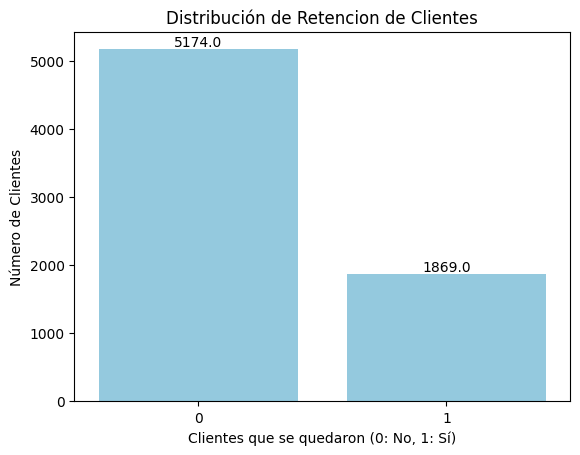

In [75]:
ax = sns.countplot(x='Evasion', data=df_normalized, color='skyblue')
plt.title('Distribución de Retencion de Clientes')
plt.xlabel('Clientes que se quedaron (0: No, 1: Sí)')
plt.ylabel('Número de Clientes')

# Add value labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

In [78]:
df_normalized.head()

,ID_Cliente,Evasion,Genero,Ciudadano_Mayor,Pareja,Dependientes,Antiguedad,Servicio_Telefonico,Varias_Lineas,Servicio_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Contrato,Factura_Electronica,Metodo_Pago,Cuentas_Mensuales,Cuentas_Totales,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.3,7.288889
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.4,6.655556
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,18.475000
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,7.538462
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.4,27.966667


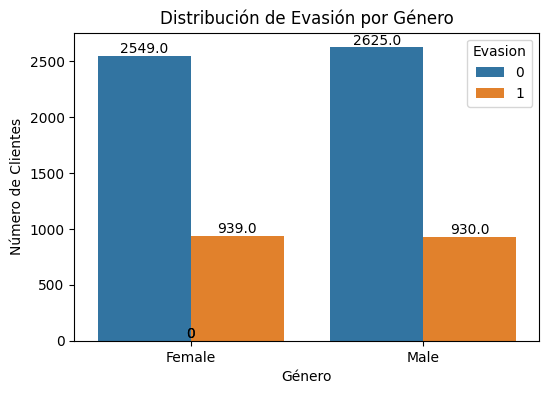

In [95]:
# Analyze Evasion by Genero
plt.figure(figsize=(6, 4))
ax1 = sns.countplot(x='Genero', hue='Evasion', data=df_normalized)
plt.title('Distribución de Evasión por Género')
plt.xlabel('Género')
plt.ylabel('Número de Clientes')
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

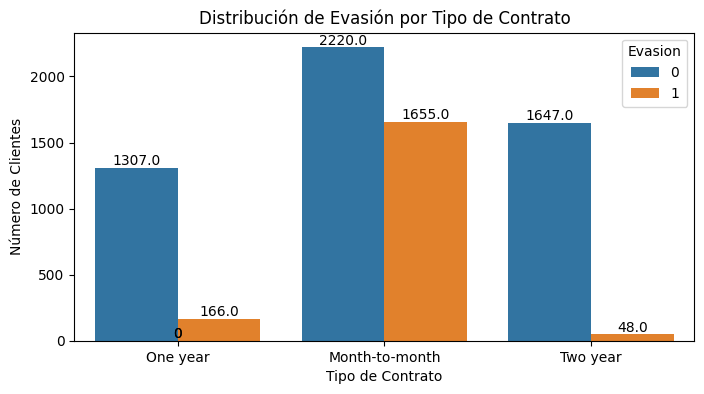

In [88]:
# Analyze Evasion by Contrato
plt.figure(figsize=(8, 4))
ax2 = sns.countplot(x='Contrato', hue='Evasion', data=df_normalized)
plt.title('Distribución de Evasión por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

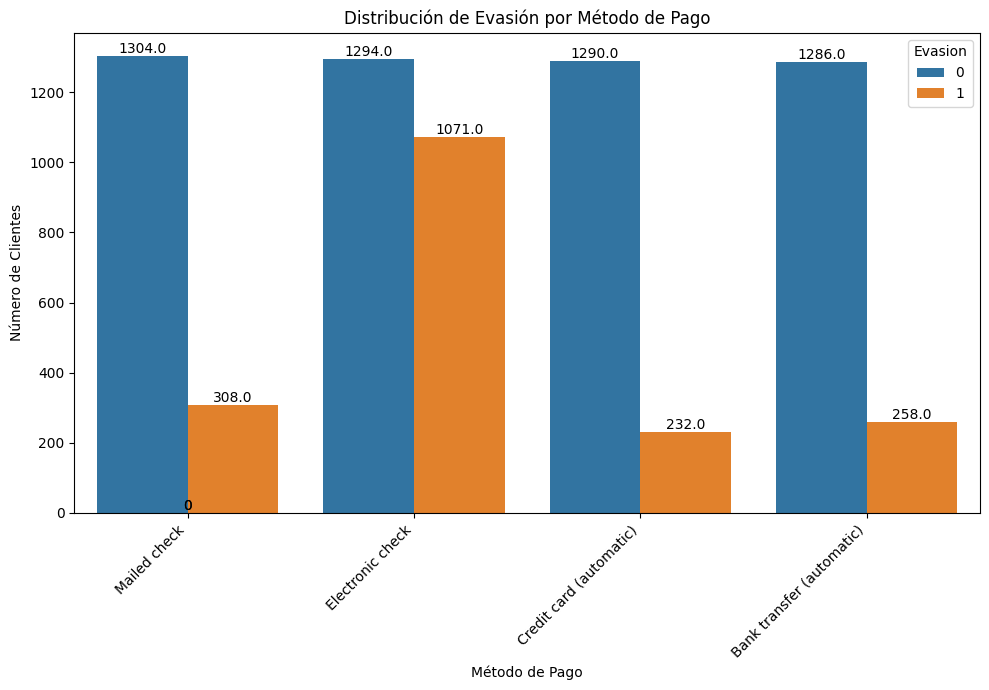

In [93]:
# Analyze Evasion by Metodo_Pago
plt.figure(figsize=(10, 7))
ax3 = sns.countplot(x='Metodo_Pago', hue='Evasion', data=df_normalized)
plt.title('Distribución de Evasión por Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45, ha='right')
for p in ax3.patches:
    ax3.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.tight_layout()
plt.show()

In [96]:
df_normalized

,ID_Cliente,Evasion,Genero,Ciudadano_Mayor,Pareja,Dependientes,Antiguedad,Servicio_Telefonico,Varias_Lineas,Servicio_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Contrato,Factura_Electronica,Metodo_Pago,Cuentas_Mensuales,Cuentas_Totales,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.3,7.288889
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.4,6.655556
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,18.475000
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,7.538462
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.4,27.966667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.9,4.242308
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.7,3.868182
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,25.150000
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,1.012687


En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.

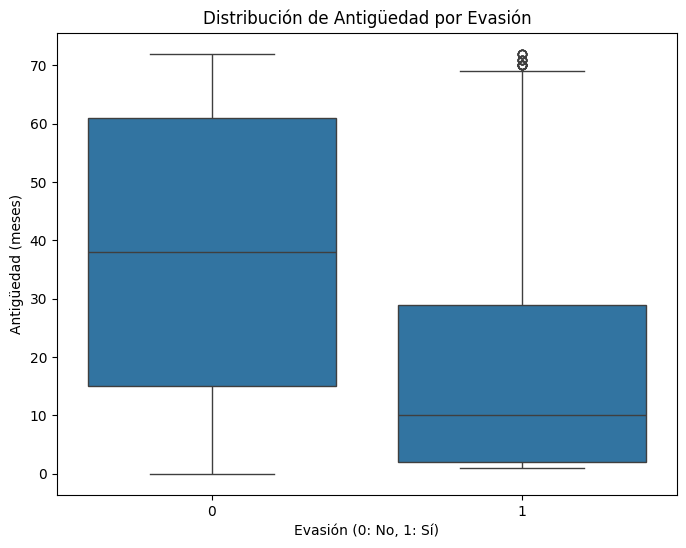

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7d8677a97380> (for post_execute):


KeyboardInterrupt: 

In [ ]:
# Analyze distribution of 'Antiguedad' by 'Evasion'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Evasion', y='Antiguedad', data=df_normalized)
plt.title('Distribución de Antigüedad por Evasión')
plt.xlabel('Evasión (0: No, 1: Sí)')
plt.ylabel('Antigüedad (meses)')
plt.show()



In [ ]:
# Analyze distribution of 'Cuentas_Totales' by 'Evasion'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Evasion', y='Cuentas_Totales', data=df_normalized)
plt.title('Distribución de Cuentas Totales por Evasión')
plt.xlabel('Evasión (0: No, 1: Sí)')
plt.ylabel('Cuentas Totales')
plt.show()

#📄Informe final